In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from scipy.signal import find_peaks


In [2]:
def showcv2img(img, title=None):
    plt.figure()
    plt.axis("off")
    if title is not None:
        plt.title(title)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [3]:
main_dir = os.getcwd() + "/../main/"
main_files = os.listdir(main_dir)

def getRandImgPath():
    return main_dir + random.choice(main_files)

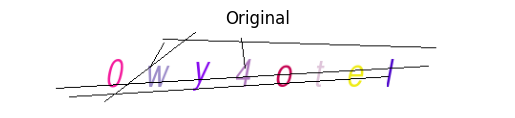

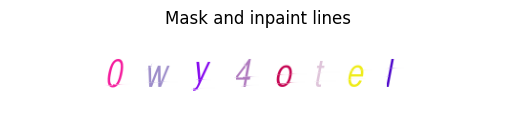

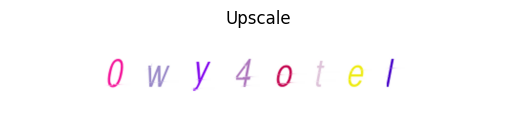

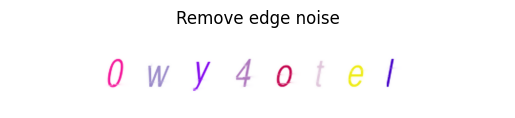

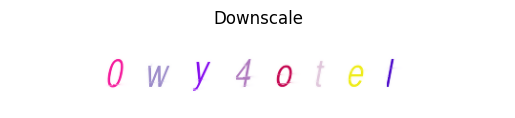

In [4]:
testimg = cv2.imread("./../main/0wy4otel-0.png")
showcv2img(testimg, "Original")
gray = cv2.cvtColor(testimg, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV)
removelines = cv2.inpaint(testimg, mask, 3, cv2.INPAINT_NS)
showcv2img(removelines, "Mask and inpaint lines")

enlarge = cv2.resize(removelines, None, None, 2.0, 2.0, cv2.INTER_CUBIC)
showcv2img(enlarge, "Upscale")

blurred = cv2.bilateralFilter(enlarge, 7, 50, 50)
showcv2img(blurred, "Remove edge noise")

shrink = cv2.resize(blurred, None, None, 0.5, 0.5, cv2.INTER_CUBIC)
showcv2img(shrink, "Downscale")

In [5]:
def removeLines(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV)
    removelines = cv2.inpaint(img, mask, 3, cv2.INPAINT_NS)
    enlarge = cv2.resize(removelines, None, None, 2.0, 2.0, cv2.INTER_CUBIC)
    blurred = cv2.bilateralFilter(enlarge, 7, 50, 50)
    shrink = cv2.resize(blurred, None, None, 0.5, 0.5, cv2.INTER_CUBIC)
    return shrink


In [6]:
# Test removeLines function on 50 random images and write them to /out dir

main_dir = os.getcwd() + "/../main/"
main_files = os.listdir(main_dir)
rand_imgs = random.sample(main_files, 50)
out_dir = os.getcwd() + "/../out/"

for i in rand_imgs:
    img_name = i.split('.png')[0] + "-combined"
    img_path = main_dir + i
    img = cv2.imread(img_path)
    removedlines = removeLines(img)
    combined = np.concatenate([img, np.zeros((1, img.shape[1], 3), img.dtype),  removedlines], axis=0)
    cv2.imwrite(f"{out_dir + img_name}.png", combined)

d:\Coding\CS4243 Project\src/../main/xvho-0.png
(80, 290, 3)


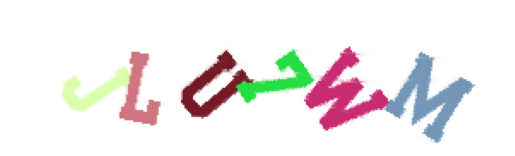

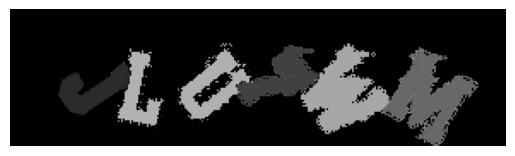

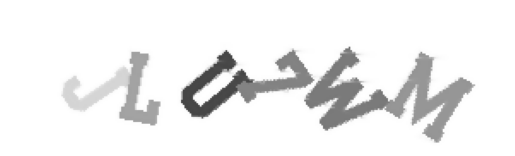

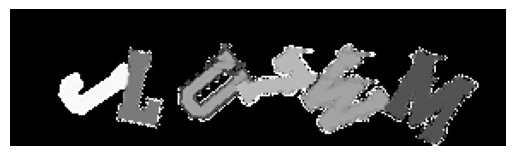

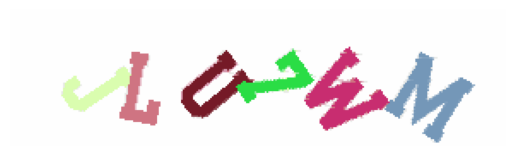

(array([[ 39,  26, 117],
        [ 69, 221,  42],
        [ 81,  72, 143],
        [112,  45, 200],
        [130, 116, 207],
        [152, 235, 137],
        [174, 152, 213],
        [175, 253, 218],
        [184, 151, 116],
        [190, 160, 128],
        [195, 167, 138],
        [200, 175, 148],
        [206, 195, 233],
        [220, 204, 187],
        [232, 234, 233],
        [254, 254, 254]], dtype=uint8),
 array([  525,   451,    44,   827,   494,    33,    85,   407,   820,
           58,    17,    35,   102,    38,   187, 19077]))

In [88]:
# trying to segment characters by color

path = getRandImgPath()
print(path)
img = cv2.imread("./../main/jlu7wm-0.png")
img = removeLines(img)
hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
print(img.shape)
showcv2img(img)
showcv2img(hls[:, :, 0])
showcv2img(hls[:, :, 1])
showcv2img(hls[:, :, 2])

d = img.reshape((-1, 3))

k = 16
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret,label,center = cv2.kmeans(np.float32(d), k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

showcv2img(res2)
np.unique(res2.reshape(-1, 3), return_counts=True, axis=0)

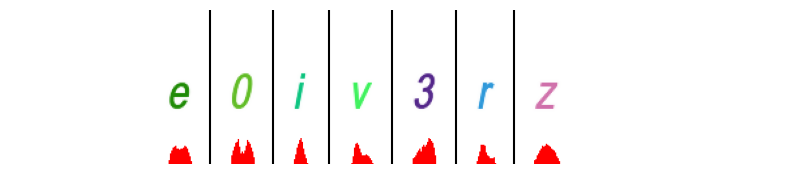

In [85]:
path = getRandImgPath()
img = cv2.imread(path)

img = removeLines(img)

# mask non white pixels
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
non_white = gray < 254
# sum over each column
vertical_hist = np.sum(non_white, axis=0)
# find gaps - corresponds to spaces between characters
hist_inv = vertical_hist.max() - vertical_hist
valleys, _ = find_peaks(hist_inv, distance=15, height=vertical_hist.max()-3, prominence=15)


fig, ax_img = plt.subplots(figsize = [10, 2])
ax_img.set_axis_off()
ax_hist = ax_img.twinx()
ax_hist.set_axis_off()
ax_hist.set_ylim(top=160)

ax_img.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax_hist.stairs(vertical_hist, fill=True, color="red")
ax_hist.vlines(valleys, ymin=0, ymax=160, color="black")

plt.show()

In [9]:
def findSegments(img):
    # mask non white pixels
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    non_white = gray < 255
    # sum over each column
    vertical_hist = np.sum(non_white, axis=0)
    # find gaps - corresponds to spaces between characters
    hist_inv = vertical_hist.max() - vertical_hist
    valleys, _ = find_peaks(hist_inv, distance=15, height=vertical_hist.max()-2, prominence=15)
    return valleys

# Takes a while to run

results = [0, 0]

main_dir = os.getcwd() + "/../main/"
main_files = os.listdir(main_dir)
rand_imgs = random.sample(main_files, 5000)
for f in rand_imgs:
    img = cv2.imread(main_dir + f)
    img = removeLines(img)
    if len(findSegments(img)) + 1 == len(f[:-6]):
        results[0] += 1
    else:
        results[1] += 1

print(results, results[0]/sum(results))

[3991, 1009] 0.7982
